In [2]:
from main import run_main
import pandas as pd
import time
from copy import copy
import matplotlib.pyplot as plt
import math

Correcciones!

graficar el fitness en función de la cantidad de generaciones 

definir que es la diversidad en nuestro conjunto -> delta en los genes y graficarla 

que pasa si soy más elitista

que pasa si soy más estocadtico 

que se vea reflejado


In [4]:
CROSSOVER_METHODS = ["one_point", "double_point", "uniform", "anular"]
SELECTION_METHODS = ["elite", "roulette", "universal", "boltzmann", "deterministic_tournament", "probabilistic_tournament", "ranking"]
MUTATION_METHODS = ["gene_mutation","uniform_multigen", "complete_mutation", "limited_multigen"]
GENES = ["items", "height"]
NEW_GENERATION_METHODS = ["use_all", "new_over_actual"]
CHARACTER_TYPES = ["warrior", "archer", "defender", "infiltrator"]

In [5]:
config = {
    "N": 150, 
    "K": 90,
    "M": 45,
    "threshold": 0.7,
    "character_type": "archer",
    "selection_method_1": "deterministic_tournament",
    "selection_method_2": "boltzmann", 
    "selection_method_3": "deterministic_tournament", 
    "selection_method_4": "boltzmann",  
    "crossing_method": "double_point",
    "mutation_method": "uniform_multigen",
    "new_generation_method": "new_over_actual",
    "gene": "items",
    "A": 0.5,
    "B": 0.5,
    "p_m": 0.1,
    "Tc": 0.1,
    "T0": 10,
    "k": 2,
    "max_generations": 100,
    "max_generations_without_change": 5,
    "delta": 0.01,
    "optimal_fitness": 100,
    "optimal_fitness_error": 2
}

Nota 1:

Fitness en funcion de cantidad de generaciones.

Vamos a tomar una poblacion grande, configuracion fija e ir variando la cantidad maxima de generaciones para formar los datos.

In [4]:
gen_limit = 200
repeats = 10

totalIterations = ((gen_limit-1) * repeats)

lista = []

currentIteration = 0 
startTime = time.time()



for max_gen in range(1,gen_limit):
    for _ in range(repeats):
        configCopy = copy(config)
        configCopy['max_generations'] = max_gen

        lista.append((run_main(configCopy),configCopy))
        currentIteration += 1
        if currentIteration % 20 == 0:  # Actualizar cada 100 iteraciones
            elapsedTime = time.time() - startTime
            estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
            percentageCompletion = (currentIteration / totalIterations) * 100
            print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")


Completion: 99.50% ETA: 32.15sss

In [5]:
lista_aux = [{**{"strength": char[0]._items["strength"],
           "agility": char[0]._items["agility"],
           "expertise": char[0]._items["expertise"],
           "endurance": char[0]._items["endurance"],
           "health": char[0]._items["health"],
           "height": char[0]._height,
           "performance": char[0].get_performance(),
           "generation": char[1]},
        **conf}
       for char, conf in lista]

df = pd.DataFrame(lista_aux)


In [6]:
df.to_csv('../data/datos1.csv', index=False)

In [7]:
meanPerformanceByGeneration = df.groupby('generation')['performance'].mean().reset_index()

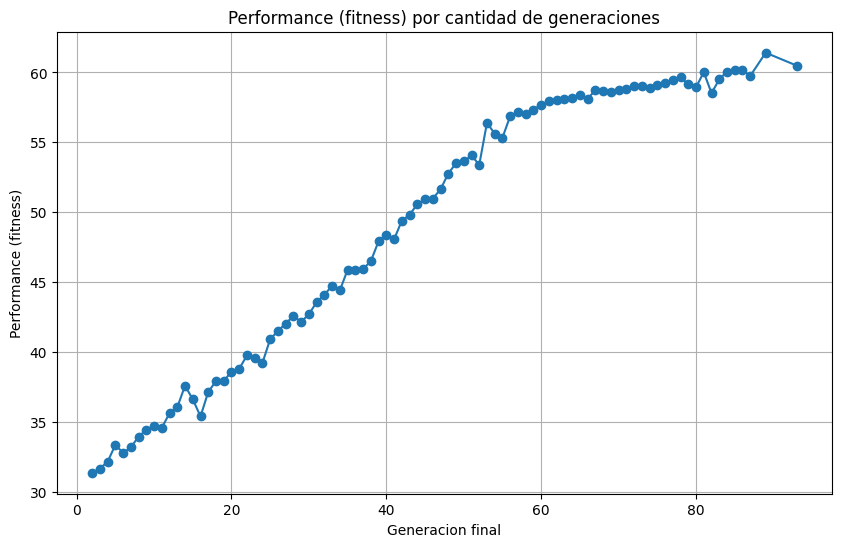

In [8]:

plt.figure(figsize=(10, 6))
plt.plot(meanPerformanceByGeneration['generation'], meanPerformanceByGeneration['performance'], marker='o')
plt.title('Performance (fitness) por cantidad de generaciones')
plt.xlabel('Generacion final')
plt.ylabel('Performance (fitness)')
plt.grid(True)
plt.show()

In [9]:
gen_limit = 200
repeats = 10

totalIterations = ((gen_limit-1) * repeats * 3)

lista_2 = []

currentIteration = 0 
startTime = time.time()



for max_gen in range(1,gen_limit):
    for select in ['elite','roulette','probabilistic_tournament']:
        for _ in range(repeats):
            configCopy = copy(config)

            configCopy['max_generations'] = max_gen
            configCopy['selection_method_1'] = select
            configCopy['selection_method_2'] = select
            configCopy['selection_method_3'] = select
            configCopy['selection_method_4'] = select

            lista_2.append((run_main(configCopy),configCopy))
            currentIteration += 1
            if currentIteration % 20 == 0:  # Actualizar cada 100 iteraciones
                elapsedTime = time.time() - startTime
                estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
                percentageCompletion = (currentIteration / totalIterations) * 100
                print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")


Completion: 99.83% ETA: 1.53sss

In [10]:
lista_aux_2 = [{**{"strength": char[0]._items["strength"],
           "agility": char[0]._items["agility"],
           "expertise": char[0]._items["expertise"],
           "endurance": char[0]._items["endurance"],
           "health": char[0]._items["health"],
           "height": char[0]._height,
           "performance": char[0].get_performance(),
           "generation": char[1]},
        **conf}
       for char, conf in lista_2]

df2 = pd.DataFrame(lista_aux_2)

In [11]:
df2.to_csv('../data/datos2.csv', index=False)

In [12]:
meanPerformanceByGenerationMethod = df2.groupby(['generation', 'selection_method_1'])['performance'].mean().reset_index()

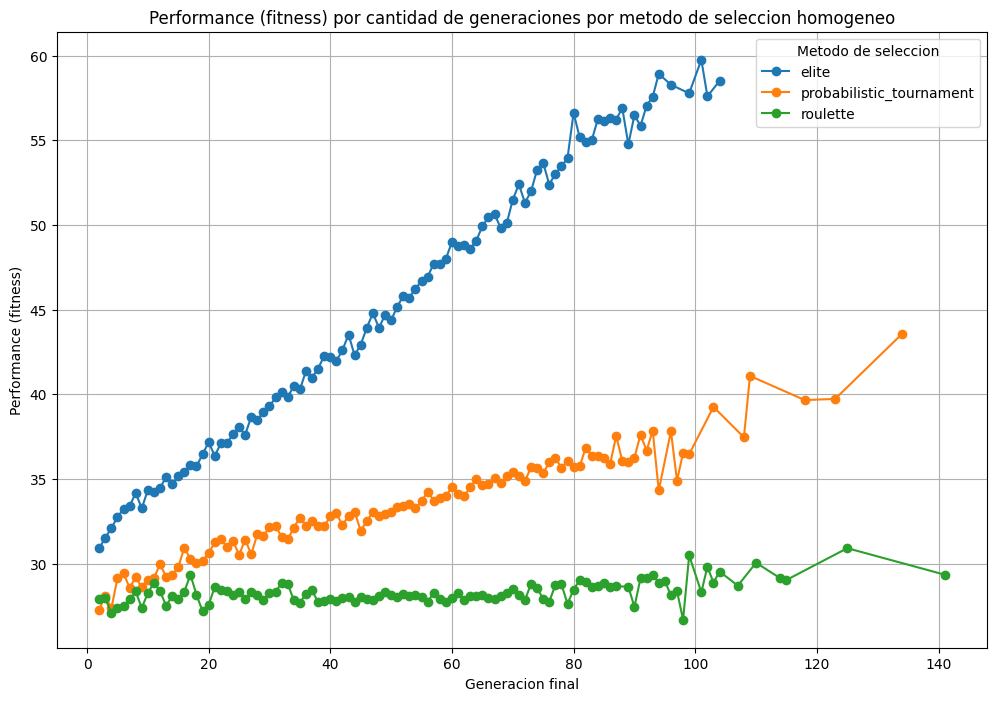

In [13]:
plt.figure(figsize=(12, 8))

for method in meanPerformanceByGenerationMethod['selection_method_1'].unique():
    subset = meanPerformanceByGenerationMethod[meanPerformanceByGenerationMethod['selection_method_1'] == method]
    plt.plot(subset['generation'], subset['performance'], marker='o', label=method)

plt.title('Performance (fitness) por cantidad de generaciones por metodo de seleccion homogeneo')
plt.xlabel('Generacion final')
plt.ylabel('Performance (fitness)')
plt.legend(title='Metodo de seleccion')
plt.grid(True)
plt.show()

Esta bueno poder tambien ver el impacto de la poblacion inicial en la performance y la cantidad de generaciones necesarias para llegar a una condicion de corte

In [24]:

gen_limit = 200
pob_limit = 200
step = 1
repeats = 10

totalIterations = (((gen_limit-1)/step) * repeats * 3 * ((pob_limit-5)/step))

lista_4 = []

currentIteration = 0 
startTime = time.time()



for max_gen in range(1,gen_limit,step):
    for init_pob in range(5,pob_limit,step):
        for select in ['elite','roulette','probabilistic_tournament']:
            for _ in range(repeats):
                configCopy = copy(config)

                configCopy['max_generations'] = max_gen

                configCopy['N'] = init_pob
                aux = math.floor(init_pob * 0.6)
                if aux % 2 == 0:
                    configCopy['K'] = aux
                else:
                    configCopy['K'] = aux-1
                configCopy['M'] = math.floor(init_pob * 0.3)

                configCopy['selection_method_1'] = select
                configCopy['selection_method_2'] = select
                configCopy['selection_method_3'] = select
                configCopy['selection_method_4'] = select

                lista_4.append((run_main(configCopy),configCopy))
                currentIteration += 1
                if currentIteration % 20 == 0:  # Actualizar cada 100 iteraciones
                    elapsedTime = time.time() - startTime
                    estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
                    percentageCompletion = (currentIteration / totalIterations) * 100
                    print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")


Completion: 16.46% ETA: 917.40s

KeyboardInterrupt: 

In [ ]:
lista_aux_4 = [{**{"strength": char[0]._items["strength"],
           "agility": char[0]._items["agility"],
           "expertise": char[0]._items["expertise"],
           "endurance": char[0]._items["endurance"],
           "health": char[0]._items["health"],
           "height": char[0]._height,
           "performance": char[0].get_performance(),
           "generation": char[1]},
        **conf}
       for char, conf in lista_4]

df4 = pd.DataFrame(lista_aux_4)

In [ ]:
df4.to_csv('../data/datos4.csv', index=False)

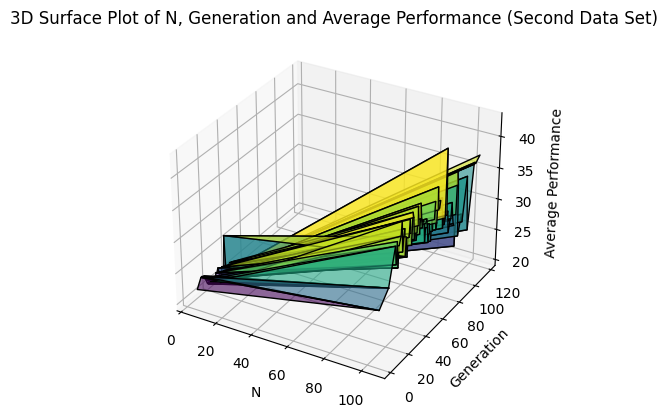

In [25]:
# Cargar el archivo CSV actualizado en un DataFrame de pandas
df_updated = pd.read_csv('../data/datos4.csv')

# Calcular el promedio de 'performance' para cada combinación de 'N', 'generation' en el segundo set de datos (df_updated)
mean_performance_3D_updated_df = df_updated.groupby(['N', 'generation'])['performance'].mean().reset_index()

# Crear una figura y un conjunto de subgráficos 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer los datos promedio para los ejes x, y, z del segundo set de datos (df_updated)
x_data_3D_updated = mean_performance_3D_updated_df['N']
y_data_3D_updated = mean_performance_3D_updated_df['generation']
z_data_3D_updated = mean_performance_3D_updated_df['performance']

# Realizar el gráfico de superficie con los datos promedio del segundo set de datos (df_updated)
ax.plot_trisurf(x_data_3D_updated, y_data_3D_updated, z_data_3D_updated, cmap='viridis', edgecolor='k', alpha=0.6)

# Etiquetas para los ejes
ax.set_xlabel('N')
ax.set_ylabel('Generation')
ax.set_zlabel('Average Performance')

# Título del gráfico
ax.set_title('3D Surface Plot of N, Generation and Average Performance (Second Data Set)')

# Mostrar el gráfico
plt.show()



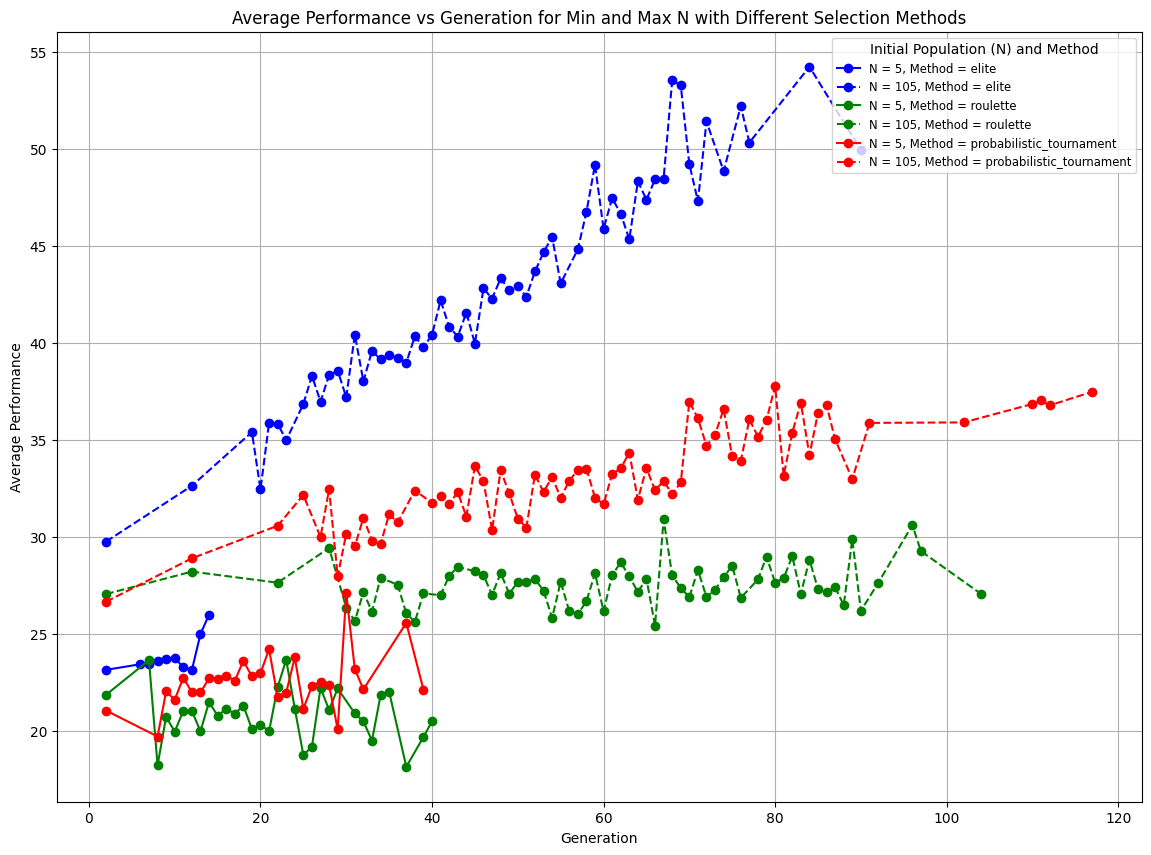

In [26]:
mean_performance_new_df = df_updated.groupby(['N', 'generation', 'selection_method_1'])['performance'].mean().reset_index()
unique_methods = df_updated['selection_method_1'].unique()
min_N_value_new = df_updated['N'].min()
max_N_value_new = df_updated['N'].max()

# Crear la figura y los ejes
plt.figure(figsize=(14, 10))

# Colores más simples y contrastantes para los métodos de selección
simple_colors = ['b', 'g', 'r', 'm', 'c', 'y']

# Graficar los datos promedio para los valores mínimo y máximo de N y cada método de selección
for idx, method in enumerate(unique_methods):
    color = simple_colors[idx % len(simple_colors)]
    for linestyle, N_value in zip(['-', '--'], [min_N_value_new, max_N_value_new]):
        subset = mean_performance_new_df[(mean_performance_new_df['N'] == N_value) & (mean_performance_new_df['selection_method_1'] == method)]
        plt.plot(subset['generation'], subset['performance'], linestyle=linestyle, color=color, marker='o', label=f'N = {N_value}, Method = {method}')

# Configurar las etiquetas y el título
plt.title('Average Performance vs Generation for Min and Max N with Different Selection Methods')
plt.xlabel('Generation')
plt.ylabel('Average Performance')
plt.legend(title='Initial Population (N) and Method', loc='upper right', fontsize='small')
plt.grid(True)

# Mostrar el gráfico
plt.show()
